# 기본 텍틱토 게임

In [1]:
# 틱택토 구현
import random

# 게임 상태
class State:
    # 초기화
    def __init__(self, pieces=None, enemy_pieces=None):
        # 돌 배치
        self.pieces = pieces if pieces != None else [0] * 9
        self.enemy_pieces = enemy_pieces if enemy_pieces != None else [0] * 9

    # 돌의 수 취득
    def piece_count(self, pieces):
        count = 0
        for i in pieces:
            if i == 1:
                count +=  1
        return count

    # 패배 여부 확인
    def is_lose(self):
        # 돌 3개 연결 여부
        def is_comp(x, y, dx, dy):
            for k in range(3):
                if y < 0 or 2 < y or x < 0 or 2 < x or \
                    self.enemy_pieces[x+y*3] == 0:
                    return False
                x, y = x+dx, y+dy
            return True

        # 배패 여부 확인
        if is_comp(0, 0, 1, 1) or is_comp(0, 2, 1, -1):
            return True
        for i in range(3):
            if is_comp(0, i, 1, 0) or is_comp(i, 0, 0, 1):
                return True
        return False

    # 무승부 여부 확인
    def is_draw(self):
        return self.piece_count(self.pieces) + self.piece_count(self.enemy_pieces) == 9

    # 게임 종료 여부 확인
    def is_done(self):
        return self.is_lose() or self.is_draw()

    # 다음 상태 얻기
    def next(self, action):
        pieces = self.pieces.copy()
        pieces[action] = 1
        return State(self.enemy_pieces, pieces)

    # 합법적인 수의 리스트 얻기
    def legal_actions(self):
        actions = []
        for i in range(9):
            if self.pieces[i] == 0 and self.enemy_pieces[i] == 0:
                actions.append(i)
        return actions

    # 선 수 여부 확인
    def is_first_player(self):
        return self.piece_count(self.pieces) == self.piece_count(self.enemy_pieces)

    # 문자열 표시
    def __str__(self):
        ox = ('o', 'x') if self.is_first_player() else ('x', 'o')
        str = ''
        for i in range(9):
            if self.pieces[i] == 1:
                str += ox[0]
            elif self.enemy_pieces[i] == 1:
                str += ox[1]
            else:
                str += '-'
            if i % 3 == 2:
                str += '\n'
        return str

In [2]:
# 랜덤으로 행동 선택
def random_action(state):
    legal_actions = state.legal_actions()
    return legal_actions[random.randint(0, len(legal_actions)-1)]

In [3]:
# 알파베타법을 활용한 상태 가치 계산
def alpha_beta(state, alpha, beta):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0

    # 합법적인 수의 상태 가치 계산
    for action in state.legal_actions():
        score = -alpha_beta(state.next(action), -beta, -alpha)
        if score > alpha:
            alpha = score

        # 현재 노드의 베스트 스코어가 새로운 노드보다 크면 탐색 종료
        if alpha >= beta:
            return alpha

    # 합법적인 수의 상태 가치의 최대값을 반환
    return alpha

# 알파베타법을 활용한 행동 선택
def alpha_beta_action(state):
    # 합법적인 수의 상태 가치 계산
    best_action = 0
    alpha = -float('inf')
    for action in state.legal_actions():
        score = -alpha_beta(state.next(action), -float('inf'), -alpha)
        if score > alpha:
            best_action = action
            alpha = score
            
    # 합법적인 수의 상태 가치값 중 최대값을 선택하는 행동 반환
    return best_action

In [4]:
# 플레이아웃
def playout(state):
    # 패배 시, 상태 가치 -1
    if state.is_lose():
        return -1
    
    # 무승부 시, 상태 가치 0
    if state.is_draw():
        return  0
    
    # 다음 상태의 상태 평가
    return -playout(state.next(random_action(state)))

In [5]:
# 원시 몬테카를로 탐색을 활용한 행동 선택
def mcs_action(state):
    # 합법적인 수 별로 10회 플레이아웃 시행 후, 상태가치의 합계 계산
    legal_actions = state.legal_actions()
    values = [0] * len(legal_actions)
    for i, action in enumerate(legal_actions):
        for _ in range(10):
            values[i] += -playout(state.next(action))

    # 합법적인 수의 상태 가치 합계의 최대값을 가지는 행동 반환
    return legal_actions[argmax(values)]

# 최대값의 인덱스를 반환
def argmax(collection, key=None):
    return collection.index(max(collection))

# 몬테카를로 트리 탐색

- 원시 몬테카를로 탐색 개량
  - 10번을 수행하는데 한번이라도 진것을 선택하게 된다면 무조건 진다
- 원리
  - 유망한 수를 더 깊이 조사해서 진것을 선택하여 지는것을 대처
  - 몬테카를로 트리 탐색
- 작동원리
  - 초기 상태
    - 루트 노드(현재 국면)과 그 자식노드(다음 한수)만으로 시작
    - 노드는 정보 다음 정보를 가짐
      - 누계 가치
        - 시뮬레이션 할때마다, 노드가 탐색 경로를 지날때 승리:1, 패배:-1, 무승부:0
      - 시행 횟수 정보
        - 시뮬레이션할때마다, 노드가 탐색 경로를 지날때 1을 더함


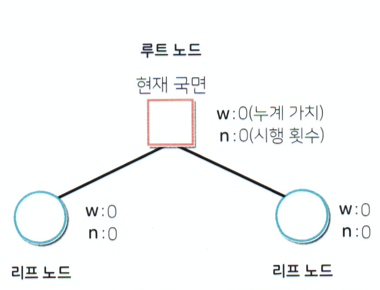

In [11]:
from IPython.display import Image
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_초기상태.png')

  - 동작
    - 선택
    - 평가
    - 전개
    - 갱신  

- 동작 > 선택  
  - 루트노드에서 자식노드가 존재하면 선택하고 이동하는 동작을 리프 노드(자식이 없는 노드)에 도착할때까지 반복
  - UCBI : 바이어스 + 승률
    - 누계가치 지표로 사용
    - UCBI이 가장 큰 자식 노드를 선택하면서 수를 진행
    - 가치 높은 수를 선택, 혹은 시행횟수가 적은 수도 적절하게 선택
    - 자식노드의 시행횟수가 1이상되야 계산이 가능하므로, 시행횟수가 0인 자식노드가 있는 경우 그 노드부터 선택함
    - 어느 쪽이던 0을 먼저 발견할쪽을 선택

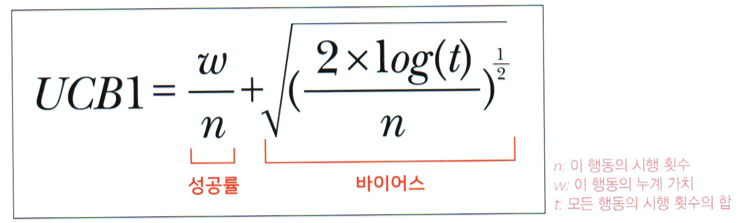

In [12]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_선택.png')

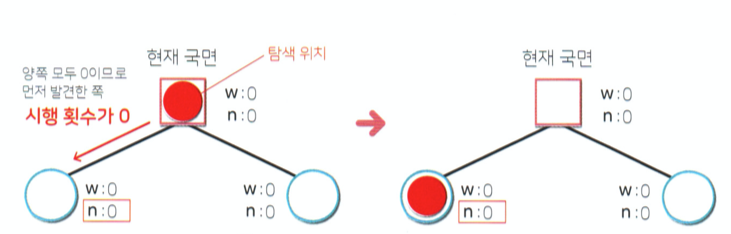

In [13]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_최초시뮬레이션에서선택.png')

- 동작 > 평가
  - 평가:탐색이 리프 노드에 도달하면, 플레이아웃 실행
  - 게임 종료시 둘수 있는 수를 무작위로놓아서 승리:1, 패배:-1, 무승부:0과 같은 가치를 더함
  - 리프노드에 보상 누계에 가치를 더하고, 시행 횟수를 1을 더함

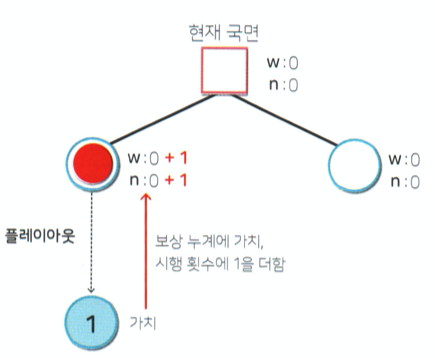

In [14]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_최초시뮬레이션평가.png')
# 만약 이 리프노드에로부터 랜덤으로 둘수 있는 수를 선택해서 수를 두고, 승리했다면 w += 1, n += 1 이다 

- 동작 > 전개
  - 전개 : 플레이아웃 이후 리프 노드의 시행횟수가 임의의 회수 이상(10회)가 되면 그 노드가가진 가능한 자식 노드로 추가

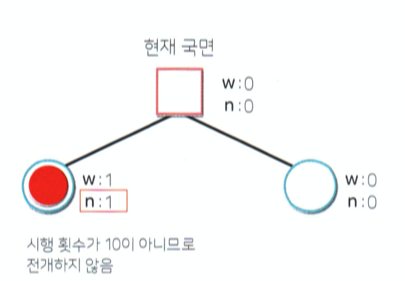

In [17]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_첫번째시뮬레이션전개.png')

- 동작 > 갱신
  - 갱신 : 플레이아웃이 끝나면 루트 노드까지 되돌아오면서 노드의 보상 누계에 플레이아웃에서 가산한 가치, 시행횟수에 1을 더하는 동작 반복

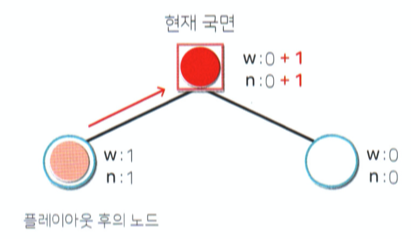

In [21]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_첫번째시뮬레이션갱신.png')

- 두번째 시뮬레이션

- 루트노드에서 출발하여 선택>평가>전개>갱신등 4동작 수행후 돌아오면 1회 시뮬레이션 완료
- 2회차는 시행횟수가 0인 리프노드 선택
- 만약 패배라면, 가치를 -1로 갱신

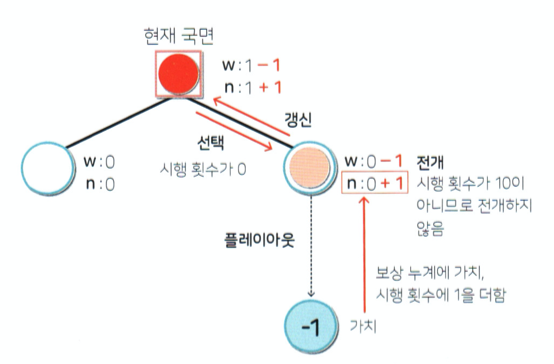

In [22]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_두번째시뮬레이션.png')

- 3회차 시뮬레이션

- 선택에서 모든 자식 노드들의 시행 횟수가 1 이상이 되었으므로, UCBI이 가장 큰 자식 노드를 선택
- 플레이아웃 실행
- 시행 횟수가 10이 아니면 전개하자 않고, 누계 가치와 시행 횟수 갱신
- 아래 그림에서는 승리이므로 +1로 갱신

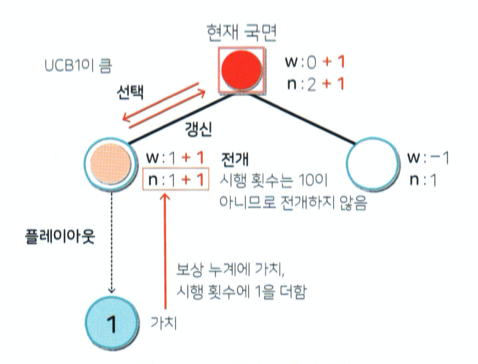

In [23]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_세번째시뮬레이션.png')

- 15회차

- 시뮬레이션을 반복해서 리프 노드의 시행 횟수가 10이 되면 전개 수행


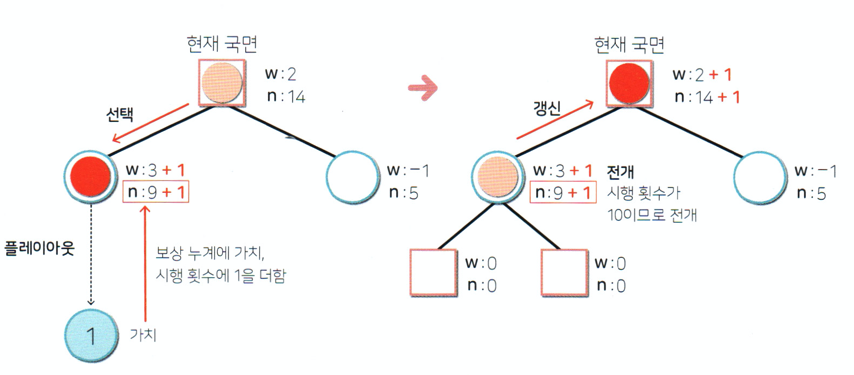

In [24]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_15회차시뮬레이션.png')

- 16회차

- 루트 노드로부터 떨어진 리프 노드에서 갱신을 수행할때는 루트 노드에 도달할때지나는 모든 노드의 누계가치, 시행횟수를 갱신

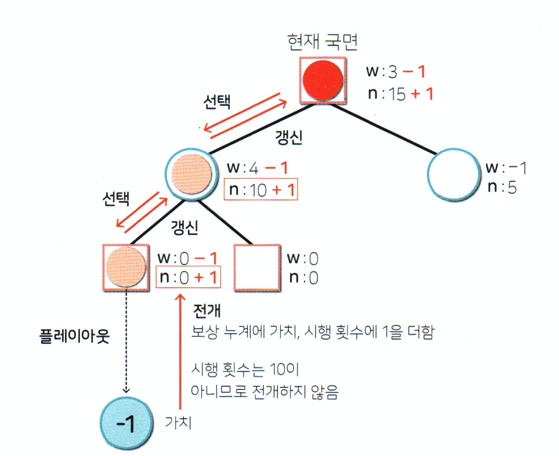

In [25]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_16회차시뮬레이션.png')

- 시행횟수가 가장 큰 행동선택
  - 충분한 시뮬레이션 반복후
    - 시행 횟수가 가장 큰 행동을 다음 한수로 선택
    - 누계 가치는 탐색시에만 사용, 최종 행동시에는 무시

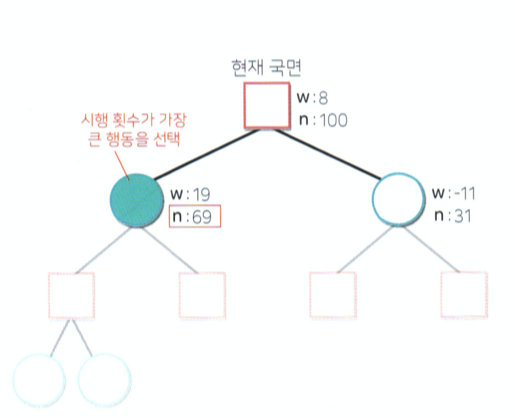

In [26]:
Image('/content/drive/My Drive/izone/책소스/알파제로를분석하며배우는인공지능/5_search/mcts_시행회수가가장큰행동선택.png')

In [27]:
import math

# 몬테카를로 트리 탐색의 행동 선택
def mcts_action(state):
    # 몬테카를로 트리 탐색의 노드 정의
    class Node:
        # 노드 초기화
        def __init__(self, state):
            self.state = state # 상태
            self.w = 0 # 보상 누계
            self.n = 0 # 시행 횟수
            self.child_nodes = None  # ㅈ녀 노드 군

        # 국면 가치 계산
        def evaluate(self):
            # 게임 종료 시
            if self.state.is_done():
                # 승패 결과로 가치 취득
                value = -1 if self.state.is_lose() else 0 # 패배 시 -1, 무승부 시 0

                # 보상 누계와 시행 횟수 갱신
                self.w += value
                self.n += 1
                return value

            # 자녀 노드가 존재하지 않는 경우 -> 리프노드
            if not self.child_nodes:
                # 플레이아웃으로 가치 얻기
                value = playout(self.state)

                # 보상 누계와 시행 횟수 갱신
                self.w += value
                self.n += 1

                # 자녀 노드 전개 -> 10번 수행했으면 전개 수행
                if self.n == 10: 
                    self.expand()
                return value

            # 자녀 노드가 존재하는 경우
            else:
                # UCB1이 가장 큰 자녀 노드를 평가해 가치 얻기
                value = -self.next_child_node().evaluate() 

                # 보상 누계와 시행 횟수 갱신
                self.w += value
                self.n += 1
                return value

        # 자녀 노드 전개
        def expand(self):
            # 빈집 찾아서
            legal_actions = self.state.legal_actions()
            self.child_nodes = []
            # 돌리면서
            for action in legal_actions:
                # 다음 패로 이동
                self.child_nodes.append(Node(self.state.next(action)))

        # UCB1이 가장 큰 자녀 노드 얻기
        def next_child_node(self):
             # 시행 횟수가 0인 자녀 노드 반환
            for child_node in self.child_nodes:
                if child_node.n == 0:
                    return child_node
            # 모든 노드가 시행횟수가 존재한다면  UCB1이 높은 대상을 추출
            # UCB1 계산
            t = 0 # 모든 행동의 시행 횟수의 합
            for c in self.child_nodes:
                t += c.n
            # 노드들 다 뒤져서
            ucb1_values = []
            for child_node in self.child_nodes:
                # UCB1 식에 의해 계산하여 추가
                ucb1_values.append(-child_node.w/child_node.n+(2*math.log(t)/child_node.n)**0.5)

            # UCB1이 가장 큰 자녀 노드 반환
            return self.child_nodes[argmax(ucb1_values)]    
    
    # 현재 국면의 노드 생성
    root_node = Node(state)
    # 노드 전개
    root_node.expand()

    # 100회 시뮬레이션 실행
    for _ in range(100):
        root_node.evaluate()

    # 시행 횟수가 가장 큰 값을 갖는 행동 반환
    # 빈집 목록 가져와서
    legal_actions = state.legal_actions()
    n_list = []
    # 노드를 다 이동하면서
    for c in root_node.child_nodes:
        # 각 노드의 수행회수를 추가
        n_list.append(c.n)
    # 수행회수가 가장 많은 노드 반납
    return legal_actions[argmax(n_list)]

In [28]:
# 몬테카를로 트리 탐색 vs. 랜덤/알파베타법 대전

# 파라미터
EP_GAME_COUNT = 100  # 평가 1회 당 게임 수

# 선 수 플레이어 포인트
def first_player_point(ended_state):
    # 1: 선 수 플레이어 승리, 0: 선 수 플레이어 패배, 0.5: 무승부
    if ended_state.is_lose():
        return 0 if ended_state.is_first_player() else 1
    return 0.5

# 1 게임 실행
def play(next_actions):
    # 상태 생성
    state = State()

    # 게임 종료 시까지 반복
    while True:
        # 게임 종료 시
        if state.is_done():
            break

        # 행동 얻기
        next_action = next_actions[0] if state.is_first_player() else next_actions[1]
        action = next_action(state)

        # 다음 상태 얻기
        state = state.next(action)

    # 선 수 플레이어 포인트 반환
    return first_player_point(state)

# 임의의 알고리즘 평기
def evaluate_algorithm_of(label, next_actions):
    # 여러 차례 대전 반복
    total_point = 0
    for i in range(EP_GAME_COUNT):
        # 1 게임 실행
        if i % 2 == 0:
            total_point += play(next_actions)
        else:
            total_point += 1 - play(list(reversed(next_actions)))

        # 출력
        print('\rEvaluate {}/{}'.format(i + 1, EP_GAME_COUNT), end='')
    print('')

    # 평균 포인트 계산
    average_point = total_point / EP_GAME_COUNT
    print(label.format(average_point))

In [29]:
# 몬테카를로 트리 탐색 VS 랜덤
next_actions = (mcts_action, random_action)
evaluate_algorithm_of('VS_Random {:.3f}', next_actions)

Evaluate 100/100
VS_Random 0.955


In [30]:
# 몬테카를로 트리 탐색 VS 알파베타법 -> 승률을 조금 높였다
next_actions = (mcts_action, alpha_beta_action)
evaluate_algorithm_of('VS_AlphaBeta {:.3f}', next_actions)

Evaluate 100/100
VS_AlphaBeta 0.340
